#      OpenCV  

<pre>1)OpenCV is an image processing library created by Intel and later supported by Willow Garage and now maintained by Itseez.
2)Opencv is available on Mac, Windows, Linux. Works in C, C++, and Python.
3)It is Open Source and free.
4)Opencv is easy to use and install.

5)Digital Images are stored in the form of matrix

<u>Computers see Images</u>
   1)GrayScale (1 Channel)
   2)RGB (3 Channel)
   
<u>Numpy</u>
1) Highly optimized Library for numerical operations
2) General Purpose array processing Package provides high performance multidimensional array object

<b><u>Install openCV</u> </b>
pip install opencv-python
->import cv2
->cv2.__version__ </pre>

### <u>How to read ,Write and Show Images</u>

<pre>
If the image is present in the given location it return that particular image array or else it will return the None

<b>Flag</b> 
 0-Grayscale
 1-ColoredImage
-1-Unchanged</pre>

In [ ]:
import cv2
img=cv2.imread("1.jpg",-1)    #read the images,flag
reshape_img=cv2.resize(img,(250,400)) #resize the image
cv2.imshow("Display_resize",reshape_img) #Show Images
k=cv2.waitKey(0)  # 0--wait untill we manually close
cv2.destroyAllWindows() # #Delete the created window

### Destroy windows with particular character

In [ ]:
import cv2
img=cv2.imread("1.jpg",-1)    #read the images
reshape_img=cv2.resize(img,(250,400)) #resize the image
cv2.imshow("Display_resize",reshape_img) #Show Images
k=cv2.waitKey(0) 
if k==27:
    cv2.destroyAllWindows()
elif k==ord('s'):
    cv2.imwrite('1_copy.jpg',reshape_img) #write the image 
    cv2.destroyAllWindows()

### Read  and Show Images from camera



In [ ]:
import cv2
cap=cv2.VideoCapture(0) #0 inbuild , External=-1
print(cap.isOpened())
while True:    #Capture Frame
    ret,frame=cap.read() # cap.read return true if the cap is available 
    if ret==True:
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)  #converting BGR to gray
        cv2.imshow('Its Capturing',gray)             # show the image
        if cv2.waitKey(1) & 0xFF==ord('q'):  #for 64 bit we provide this OxFF mask  waitkey(any integer) ord(any character)
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()

### Store the captured video in mp4 file

In [ ]:
import cv2
cap=cv2.VideoCapture(0)
print(cap)
#Define the codec and create VideoWriter object
# FourCC is a 4-byte code used to specify the video codec
# Codec used for compressing and decompressing digital media, especially audio and video
save=cv2.VideoWriter_fourcc(*'XVID') #XVID also requires a 3 channel image
out=cv2.VideoWriter('output.mp4',save,20.0,(640,480)) #20.0-No.of frames per second ,((column, row))


while (cap.isOpened()): # True if the video file opened
    ret,frame=cap.read()
    if ret==True:
        out.write(frame)   #write the video
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow("Display",gray)
        if cv2.waitKey(1) & 0xFF==ord('q'): 
            break
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()

### Display the Width and Height of the video Frame -   Setting the camera Parameter

In [ ]:
import cv2
cap=cv2.VideoCapture(0) #0 inbuild , External=-1

print(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) #return the video frame width
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) #return the video frame height

print(cap.isOpened()) #True if the video file opened

cap.set(3,700) #associate parameter for width is 3
cap.set(4,400) 

print(cap.get(3)) #Display only the available width
print(cap.get(4)) #display only the availale parameter

while True:
    ret,frame=cap.read()
    if ret==True:
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)  #converting BGR to gray
        cv2.imshow('Its Capturing',gray)             # show the image
        if cv2.waitKey(1) & 0xFF==ord('q'):
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

### Display current date and time in runtime

In [ ]:
import cv2
import datetime

cap=cv2.VideoCapture(0)

while cap.isOpened():
    ret,frame=cap.read()
    if ret==True:
        font=cv2.FONT_HERSHEY_SIMPLEX #font style
        datet=str(datetime.datetime.now()) #text that shows in a video
        cv2.putText(frame,datet,(70,30),font,0.8,(234,134,132),3,cv2.LINE_AA) # #img,text,codinates,font,width,color,thickness
        cv2.imshow('Display',frame)
        if cv2.waitKey(1) & 0xFF==ord('q'):
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

### '''Handle Mouse Button ----To find the cordinate of the particular Image'''


In [ ]:
import cv2
events=[i for i in dir(cv2) if 'EVENT' in i] # Mouse handling events
print(events)

def click_button(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDOWN:
        print(x,',',y)
        font=cv2.FONT_HERSHEY_SIMPLEX
        strxy=str(x)+','+str(y)
        cv2.putText(img,strxy,(x,y),font,1,(255,255,255),2) 
        cv2.imshow('image',img)
    if event==cv2.EVENT_RBUTTONDOWN:
        b=img[y,x,0]
        g=img[y,x,1]
        r=img[y,x,2]
        font=cv2.FONT_HERSHEY_SIMPLEX
        strbgr=str(b)+','+str(g)+','+str(r)
        cv2.putText(img,strbgr,(x,y),font,1,(212,87,193),3)
        cv2.imshow('image',img)
img=cv2.imread('1.jpg')
img=cv2.resize(img,(400,400))
cv2.imshow('image',img)
cv2.setMouseCallback('image',click_button)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Mege two images into a single Image

In [ ]:
import cv2
import numpy as np

img1=cv2.imread('1.jpg')
img2=cv2.imread('2.jpg')

#split
b,g,r=cv2.split(img1) #split image into b,g,r
img=cv2.merge((b,g,r)) #merge b,g,r into oiginal image
print(img.shape)
print(img.size)
print(img.dtype)

img1=cv2.resize(img,(500,500))
img2=cv2.resize(img,(500,500))


op=cv2.add(img2,img1) #add two images
op=cv2.addWeighted(img1,.5,img2,.9,0) #.5 img thickness , .9 img2--Thickness

cv2.imshow('image',op)
cv2.waitKey(0)
cv2.destroyAllWindows()

### <u>Bitwise Operations</u>



<pre>
and  = 0 0 0           or  = 0 0 0
       0 1 0                 0 1 1
       1 0 0                 1 0 1
       1 1 1                 1 1 1

Xor  = 0 0 0          Not  = 0 1
       0 1 1                 1 0
       1 0 1
       1 1 0

</pre>

In [ ]:
import cv2

img1=cv2.imread('1.jpg',-1)
img2=cv2.imread('2.jpg',-1)

img1=cv2.resize(img1,(400,400)) #resize Image
img2=cv2.resize(img2,(400,400))

#bitand=cv2.bitwise_and(img1,img2)
#bitor=cv2.bitwise_or(img1,img2)
#bitxor=cv2.bitwise_xor(img1,img2)
bitnot1=cv2.bitwise_not(img1)
bitnot2=cv2.bitwise_not(img2)

cv2.imshow('New_Image',bitnot2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Geometric Shapes on Images

In [ ]:
import cv2
import numpy as np

img=cv2.imread('1.jpg',1)
img=cv2.resize(img,(400,400))
#Line
img=cv2.line(img,(100,75),(0,0),(0,0,255),4)  #(image,(startpoint),(endpoint),colorBGR,Thickness)

#ArrowLine
img=cv2.arrowedLine(img,(10,255),(234,255),(0,0,255),10) #(Image,(startpoint),(endpoint),colorBGR,Thickness)

#Rectangle
#Top left,Bottom Right
img=cv2.rectangle(img,(180,153),(45,76),(0,255,0),4) #(Image,pt1(x1,y1),pt2,color,thickness)

#Circle
img=cv2.circle(img,(185,215),60,(123,234,197),4)  #(image,center,radius,color,thickness)

cv2.imshow('IMAGE',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Bing Trackbar (Change the value of the image dynamically at runtime)

In [ ]:
import cv2
import numpy as np

img=np.zeros((300,512,3),dtype=np.uint8) 
cv2.namedWindow('image')

def nothing(x): #callback (executed everytime trackbar value changes)
    print(x)

cv2.createTrackbar('B','image',0,255,nothing) #creating a trackbar (trackbarname,windowname,startpoint,end,callback)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('R','image',0,255,nothing)

switch='0 :OFF 1 : ON'   
cv2.createTrackbar(switch,'image',0,1,nothing)


while True:
    cv2.imshow('image',img)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
    
    b=cv2.getTrackbarPos('B','image') #value of the created trackbar
    g=cv2.getTrackbarPos('G','image')
    r=cv2.getTrackbarPos('R','image')
    s=cv2.getTrackbarPos(switch,'image')    
    if s==0:    #if switch==0 then the image will be black
        img[:]=0
    else:   
        img[:]=[b,g,r]
        

cv2.destroyAllWindows()

### Example-2 Bind Tracker -- color/gray image

In [ ]:
import cv2
import numpy as np


cv2.namedWindow('image')

def nothing(x):
    print(x)
    
cv2.createTrackbar('Picture','image',10,100,nothing)
switch='color/gray'
cv2.createTrackbar(switch,'image',0,1,nothing)

while True:
    img=cv2.imread('1_copy.jpg')
    img=cv2.resize(img,(400,400))
    pos=cv2.getTrackbarPos('Picture','image')
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img,str(pos),(50,150),font,3,(213,89,64),2)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break

    s=cv2.getTrackbarPos(switch,'image')  
    
    if s==0:
        pass
       #img=cv2.bitwise_not(img)
        
    else:
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
   
    img=cv2.imshow('image',img)
    
cv2.destroyAllWindows()

### <b><u> HSV (Hue,Saturation and Value)</u></b>


<pre>
-->Hue( 0,360 ) degree
-->Saturation- Amount of color( Depth of the pigment)(0-100%)
-->Value - Brightness of the color(0-100%)

<img src="Image.png">

-->In RGB color space all are correlated to the color Luminants (We called Intensity).
-->In oter words we cannot seperate color information from Luminants

-->HSV is used to seperate Image Luminants from color infomation
</pre>



##### Object Detection and Object Tracking

In [1]:
#Example 1 (Usig Image)
import cv2
import numpy as np

cv2.namedWindow('image') #window name


while True:
    img=cv2.imread('color.jpg')
    hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV) #convert bgr image to hsv 
    
    l_b=np.array([110,50,50]) #blue color 
    u_b=np.array([130,255,255])
    
    mask=cv2.inRange(hsv,l_b,u_b)
    
    res=cv2.bitwise_and(img,img,mask=mask)
    
    cv2.imshow('image',img)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
     
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break


cv2.destroyAllWindows()

In [2]:
#Example-2(Using Camera)
import cv2
import numpy as np

cap=cv2.VideoCapture(0)
cv2.namedWindow('Tracking')
def nothing(x):
    pass

cv2.createTrackbar("LH",'Tracking',0,255,nothing) #creating trackbar
cv2.createTrackbar("LS",'Tracking',0,255,nothing)
cv2.createTrackbar("LV",'Tracking',0,255,nothing)
cv2.createTrackbar("UH",'Tracking',255,255,nothing)
cv2.createTrackbar("US",'Tracking',255,255,nothing)
cv2.createTrackbar("UV",'Tracking',255,255,nothing)


while cap.isOpened():
    
    _,img=cap.read()
    
    hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        
    l_h=cv2.getTrackbarPos("LH",'Tracking')#getting trackbar value 
    l_s=cv2.getTrackbarPos("LS",'Tracking')
    l_v=cv2.getTrackbarPos("LV",'Tracking')
    u_h=cv2.getTrackbarPos('UH','Tracking')
    u_s=cv2.getTrackbarPos('US','Tracking')
    u_v=cv2.getTrackbarPos('UV','Tracking')
    
    l_b=np.array([l_h,l_s,l_v]) #Lower_boudary=lower_hue,lower_saturation,lower_value
    u_b=np.array([u_h,u_s,u_v]) #Upper_boundary=upper_hue,upper_saturation,upper_value
    
    
    mask=cv2.inRange(hsv,l_b,u_b)
    
    res=cv2.bitwise_and(img,img,mask=mask)
    
    cv2.imshow('image',img)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
     
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

### Simple Image Threshold
<pre>
Thresholding is the simplest method of image segmentation. From a grayscale image, thresholding can be used to create binary images.
</pre>
<pre>
THRESH_BINARY =0,1
THRESH_BINARY_INV=1,0
THRESH_TRUNC - Before threshold the value will not change its remains same as Original Image
               After threshold to end the value will remains same as threshold value
               
THRESH_TOZERO - Whenever pixel Value less than threshold,the value assign to zero
THRESH_TOZERO_INV - opposite to THRESH_TOZERO
</pre>

In [22]:
import cv2
import numpy as np
img=cv2.imread('bgradient.jpg')
_,thr1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
_,thr2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
_,thr3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
_,thr4=cv2.threshold(img,121,255,cv2.THRESH_TOZERO)
_,thr5=cv2.threshold(img,121,255,cv2.THRESH_TOZERO_INV)
cv2.imshow('Image',img)
cv2.imshow('thresh',thr5)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Adaptive Threshold

<pre>
1) Adaptive_Thresh_Mean_C
2) Adaptive_Thresh_Gaussian_C

-->Simple Threshold might not good at all conditions

-->Adaptive Threshold Algorithm calculate the thresholding value for different regions .So the thresholding value is not
   global for each and every pixel of the Image.
   
-->Adaptive thresholding changes the threshold dynamically over the image. Adaptive thresholding typically takes a gray 
   scale as input and, in the simplest implementation, outputs a binary image representing the segmentation.
</pre>

In [35]:
import cv2
img=cv2.imread('sudoku.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thr1=cv2.threshold(img,107,255,cv2.THRESH_BINARY) #(source,thresholdvalue,maxvalue)

thr2=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,2) #blocksize,c
thr3=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,2)
cv2.imshow('Image',img)
cv2.imshow('Thresh1',thr2)
cv2.imshow('Thresh2',thr3)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Matplotlib with openCV
<pre>
1)Matplotlib is a user friendly, but powerful, plotting library for python.
2)It is a python 2D plotting library 
3)It is widely used with openCV to display graph,images and histograms.

</pre>
<pre>
-->OpenCV reads the image in BGR format
-->Matplotlib reads the image in RGB format

</pre>

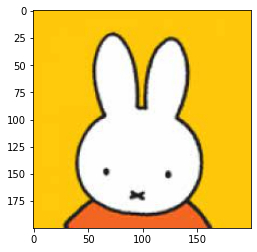

In [2]:
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('i.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2.imshow('Image',img)
plt.imshow(img)
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

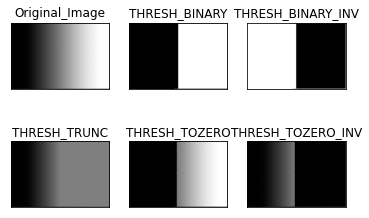

In [7]:
import cv2
import numpy as np
img=cv2.imread('bgradient.jpg')
_,thr1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
_,thr2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
_,thr3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
_,thr4=cv2.threshold(img,121,255,cv2.THRESH_TOZERO)
_,thr5=cv2.threshold(img,121,255,cv2.THRESH_TOZERO_INV)


titles=['Original_Image','THRESH_BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images=[img,thr1,thr2,thr3,thr4,thr5]

for i in range(len(images)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()